In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


## FUNCIONES

In [3]:
def eval_model(target, predictions, problem_type, metrics):
    '''
    Evalúa el rendimiento de un modelo de machine learning, ya sea de regresión o clasificación, basándose en una lista de métricas específicas.

    Argumentos:
    target (array-like): Valores verdaderos del conjunto de datos.
    predictions (array-like): Predicciones generadas por el modelo.
    problem_type (str): Tipo de problema, 'regresión' o 'clasificación'.
    metrics (list of str): Lista de etiquetas de métricas para evaluar. Las métricas válidas para regresión incluyen 'RMSE', 'MAE', 'MAPE', 'GRAPH'. 
    Para clasificación, las métricas incluyen 'ACCURACY', 'PRECISION', 'RECALL', 'CLASS_REPORT', 'MATRIX', 'MATRIX_RECALL', 'MATRIX_PRED', 
    'PRECISION_X', 'RECALL_X', donde 'X' es una etiqueta de clase específica.

    Retorna:
    tuple: Una tupla que contiene los resultados de las métricas evaluadas en el orden en que se especificaron en el argumento `metrics`.

    Levanta:
    ValueError: Si el cálculo de 'MAPE' falla debido a valores de target con cero.

    Nota:
    La métrica 'GRAPH' muestra un gráfico pero no retorna un valor numérico, por lo tanto, no se incluye en la tupla de retorno.
    Las métricas 'PRECISION_X' y 'RECALL_X' requieren que 'X' sea reemplazado por la etiqueta específica de la clase a evaluar.
    '''
    results = []

    if problem_type == 'regresión':
        for metric in metrics:
            if metric == 'RMSE':
                rmse = np.sqrt(mean_squared_error(target, predictions))
                print(f'RMSE: {rmse}')
                results.append(rmse)
            elif metric == 'MAE':
                mae = mean_absolute_error(target, predictions)
                print(f'MAE: {mae}')
                results.append(mae)
            elif metric == 'MAPE':
                try:
                    mape = mean_absolute_percentage_error(target, predictions)
                    print(f'MAPE: {mape}')
                    results.append(mape)
                except ValueError as e:
                    print("Error al calcular MAPE:", e)
                    raise
            elif metric == 'GRAPH':
                plt.scatter(target, predictions)
                plt.xlabel('True Values')
                plt.ylabel('Predictions')
                plt.title('Comparison of True Values vs Predictions')
                plt.show()
                
    elif problem_type == 'clasificación':
        for metric in metrics:
            if metric == 'ACCURACY':
                accuracy = accuracy_score(target, predictions)
                print(f'Accuracy: {accuracy}')
                results.append(accuracy)
            elif metric.startswith('PRECISION_'):
                class_label = metric.split('_')[1]
                precision = precision_score(target, predictions, labels=[class_label], average=None)
                print(f'Precision for {class_label}: {precision[0]}')
                results.append(precision[0])
            elif metric.startswith('RECALL_'):
                class_label = metric.split('_')[1]
                recall = recall_score(target, predictions, labels=[class_label], average=None)
                print(f'Recall for {class_label}: {recall[0]}')
                results.append(recall[0])
            elif metric == 'PRECISION':
                precision = precision_score(target, predictions, average='macro')
                print(f'Precision: {precision}')
                results.append(precision)
            elif metric == 'RECALL':
                recall = recall_score(target, predictions, average='macro')
                print(f'Recall: {recall}')
                results.append(recall)
            elif metric == 'CLASS_REPORT':
                print(classification_report(target, predictions))
            elif metric == 'MATRIX':
                cm = confusion_matrix(target, predictions)
                ConfusionMatrixDisplay(cm).plot()
                plt.show()
            elif metric == 'MATRIX_RECALL':
                cm = confusion_matrix(target, predictions, normalize='true')
                ConfusionMatrixDisplay(cm).plot()
                plt.show()
            elif metric == 'MATRIX_PRED':
                cm = confusion_matrix(target, predictions, normalize='pred')
                ConfusionMatrixDisplay(cm).plot()
                plt.show()
    
    return tuple(results)

# CLASIFICACIÓN

In [4]:
df = pd.read_csv('./bank.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [5]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
target = "deposit"

In [6]:
df_numerical = train_set.select_dtypes(include=[np.number])
df_numerical['deposit'] = df['deposit'].map({'yes': 1, 'no': 0})


In [7]:
X = df_numerical.drop('deposit', axis=1)
y = df_numerical['deposit']

dt = DecisionTreeClassifier(max_depth= 10, random_state=42)
dt.fit(X, y)

df_feature_importances = pd.DataFrame({'feature': X.columns, 'importance': dt.feature_importances_})
df_feature_importances = df_feature_importances.sort_values('importance', ascending=False)


In [8]:
# Nos quedamos con las 4 variables más importantes
X = df_numerical[df_feature_importances['feature'].values[:4]]

In [9]:
X_train = train_set[X.columns]
y_train = train_set[target]

X_test = test_set[X.columns]
y_test = test_set[target]

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

In [86]:
#target ---->>  y_test
#predicciones target ----->>  y_pred

In [11]:
eval_model(y_test,y_pred,"clasificación",["RECALL","PRECISION"])

Recall: 0.7262647875369136
Precision: 0.7339797190590973


(0.7262647875369136, 0.7339797190590973)

# REGRESIÓN

In [12]:
features = pd.read_csv('./temps.csv')
features.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [13]:
features = pd.get_dummies(features).drop(columns=['year'])

In [14]:
y = features['actual']
X = features.drop('actual', axis=1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_reg,y_train_reg)
y_pred_reg = dtr.predict(X_test_reg)


In [ ]:
#target ---->>  y_test_reg
#predicciones target ----->>  y_pred_reg

MAE: 5.551724137931035
MAPE: 0.08658009343819581


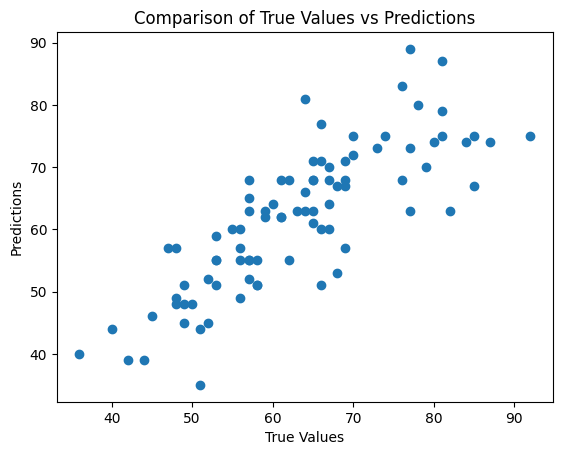

(5.551724137931035, 0.08658009343819581)

In [20]:
eval_model(y_test_reg,y_pred_reg,"regresión",["MAE","MAPE","GRAPH"])